In [27]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [28]:

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)



In [29]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [30]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

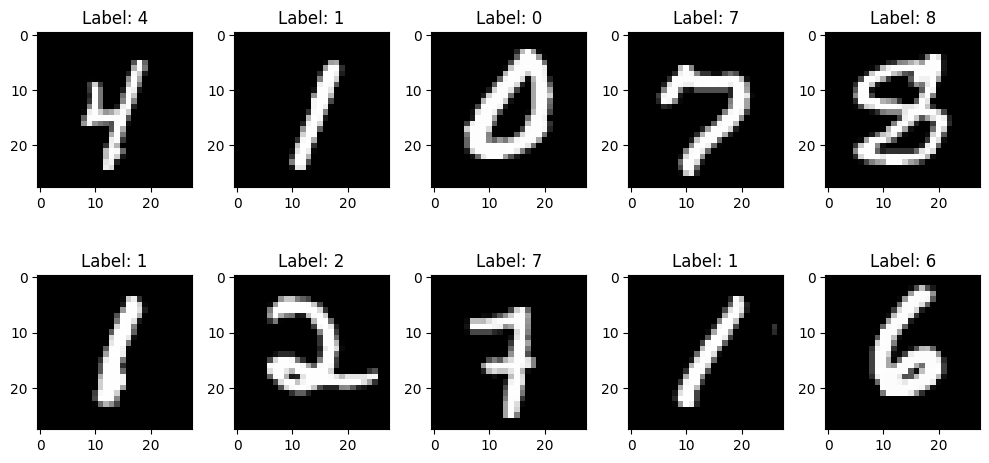

In [31]:
# Carregar o conjunto de dados
(ds_train_p, ds_test_p), ds_info_p = tfds.load('mnist', split=['train', 'test'], shuffle_files=True, with_info=True)

# Pegar as primeiras 10 imagens e rótulos do conjunto de dados
images = []
labels = []
for example in ds_train_p.take(10):
    images.append(example["image"])
    labels.append(example["label"])

# Plotar as imagens
fig = plt.figure(figsize=(10, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f'Label: {labels[i].numpy()}')

plt.tight_layout()
plt.show()

In [34]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=100,
    validation_data=ds_test,
)
model.save('mnist_model.keras')

Epoch 1/100


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6159 - sparse_categorical_accuracy: 0.8322 - val_loss: 0.1882 - val_sparse_categorical_accuracy: 0.9449
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1737 - sparse_categorical_accuracy: 0.9504 - val_loss: 0.1275 - val_sparse_categorical_accuracy: 0.9628
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1184 - sparse_categorical_accuracy: 0.9666 - val_loss: 0.1060 - val_sparse_categorical_accuracy: 0.9686
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0909 - sparse_categorical_accuracy: 0.9735 - val_loss: 0.0969 - val_sparse_categorical_accuracy: 0.9702
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0772 - sparse_categorical_accuracy: 0.9768 - val_loss: 0.0863 - val_sparse_categorical_accuracy: 0.9726
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0584 - sparse_categorical_accuracy: 0.9838 - val_loss: 0.0810 - val_sparse_categorical_accuracy: 0.9765
Epoch 7/10

In [35]:


from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
model = tf.keras.models.load_model('mnist_model.keras')
# Carregar a imagem
img = load_img('quatro.jpg', color_mode='grayscale', target_size=(28, 28))

# Converter a imagem para um array numpy e normalizar os pixels para o intervalo [0, 1]
img_array = img_to_array(img) / 255.

# Adicionar uma dimensão extra para indicar o número de imagens (1)
img_array = np.expand_dims(img_array, axis=0)

# Usar o modelo para fazer uma previsão
prediction = model.predict(img_array)

# A previsão é um vetor de 10 elementos representando as probabilidades para cada dígito
# Usamos argmax para obter o dígito com a maior probabilidade
predicted_digit = np.argmax(prediction)

print(f'O dígito previsto é: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
O dígito previsto é: 2
